In [2]:
import sys
import os

os.environ['ABACUS'] = os.environ['HOME'] + '/abacus'
sys.path.insert(0, os.environ['ABACUS'])

from pathlib import Path

from abacusnbody.data import read_abacus
from abacusnbody.data.compaso_halo_catalog import CompaSOHaloCatalog
import astropy.table
from astropy.table import Table
import numba as nb
import numpy as np
import matplotlib.pyplot as plt

from Abacus.Analysis.PowerSpectrum import TSC

box = 2000.
AbacusSummit = Path('/mnt/home/lgarrison/ceph/AbacusSummit/')

import multicosmo

import importlib
importlib.reload(multicosmo)

ImportError: libtbb.so.12: cannot open shared object file: No such file or directory

In [8]:
hcen = np.array([-960.33453, -176.59247, -903.21063])

def load_all_sims():
    ph000 = sorted(AbacusSummit.glob('AbacusSummit_base_c*_ph000'))

    # TODO: farm out
    sim = []
    for s in ph000:
        sims += [multicosmo.cutout_sim_particles(s, hcen, 30.)]

    return sims

sims = load_all_sims()

In [9]:
cat000 = CompaSOHaloCatalog(AbacusSummit / 'AbacusSummit_base_c000_ph000/halos/z0.500/halo_info/halo_info_000.asdf', verbose=True, cleaned=False,
                            fields=('N','x_L2com'))
cat000.halos.sort(keys='N', reverse=True)

2 halo catalog fields (0 cleaned) requested. Reading 2 fields from disk. Computing 0 intermediate fields.

CompaSO Halo Catalog
AbacusSummit_base_c000_ph000 @ z=0.5
------------------------------------
     Halos: 1.17e+07 halos,       2 fields,   0.188 GB
Subsamples:        0 particles,   0 fields,       0 GB
Cleaned halos: False


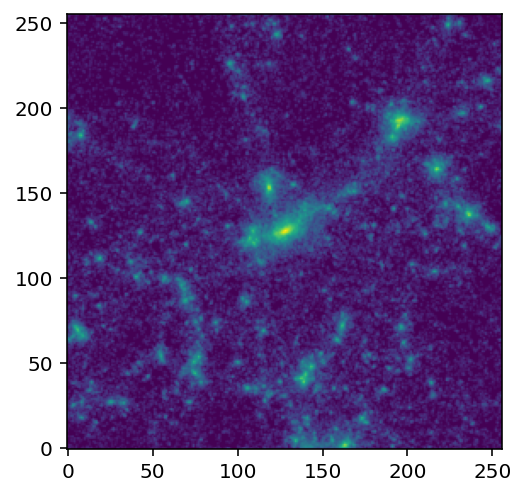

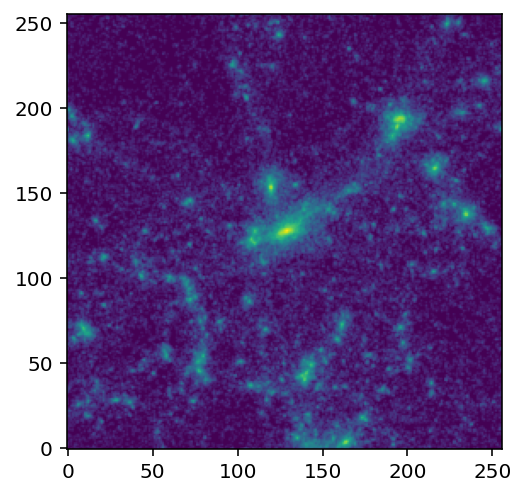

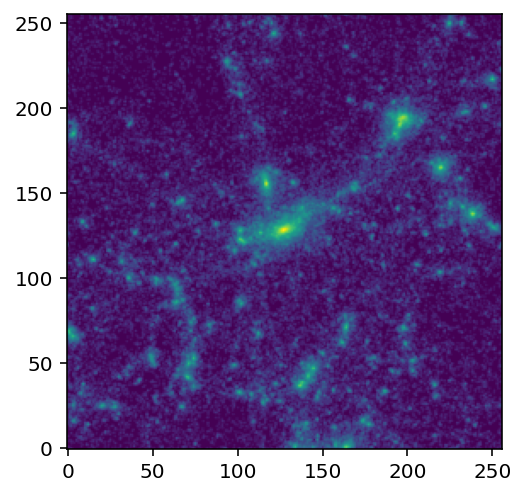

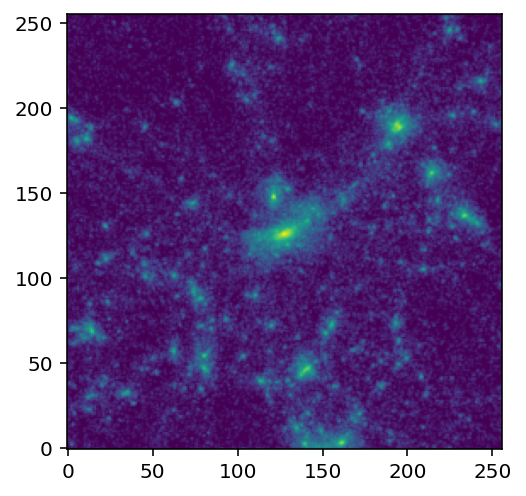

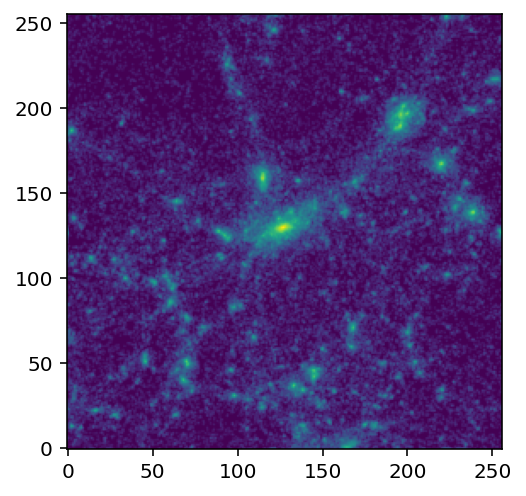

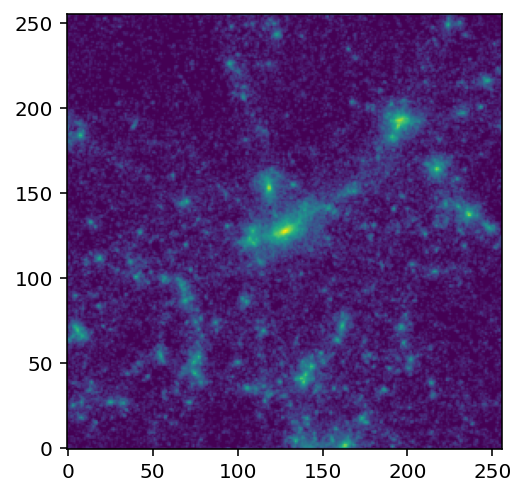

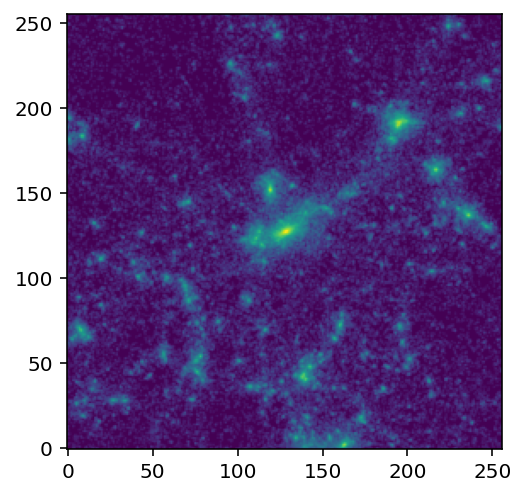

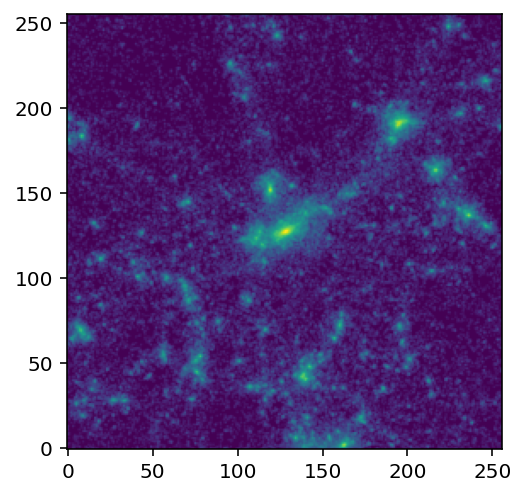

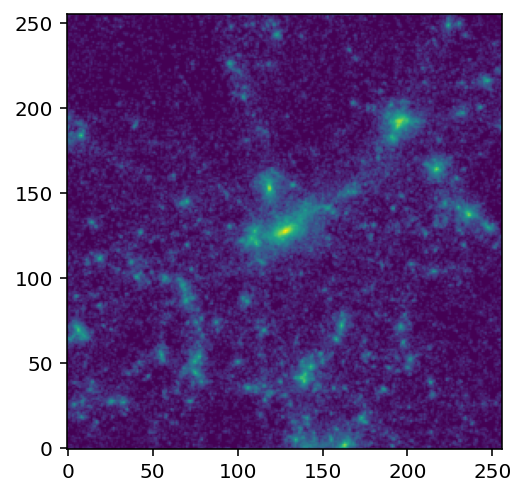

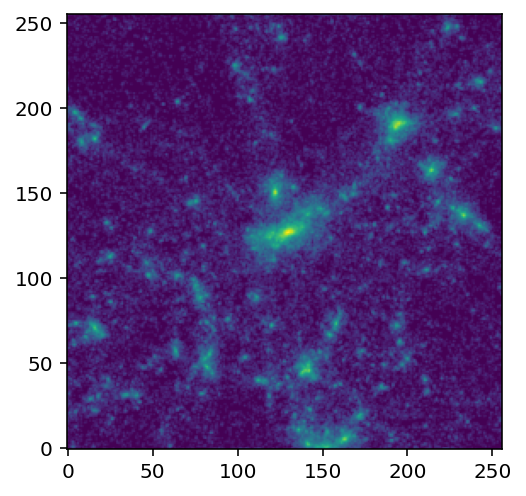

In [16]:
for sim in sims:
    multicosmo.plot_tsc(sim['pos'], cat000.halos['x_L2com'][6],
        w:=np.array([30,30,30]), 256, box=box, tscbox=w[0],
        )

In [29]:
cat000.halos

N,x_L2com [3]
uint32,float32
728813,-949.20917 .. -954.7472
399891,-970.5429 .. 81.74401
346756,-960.51996 .. 4.886485
324209,-964.9003 .. 391.42566
304163,-975.07837 .. 366.8017
299916,-953.5698 .. -555.79584
288678,-960.33453 .. -903.21063
280771,-945.0355 .. 207.78053
250474,-988.52734 .. 183.10265
